### Titanic Classification

### Problem Statement:

#### Make a system which tells whether the person will be save from sinking. What factors were most likely lead to success-socio-economic status, age, gender and more.

### Import the module

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the data

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [4]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [5]:
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### Preprocessing the data

In [8]:
train.drop(columns=['Cabin'],inplace=True)
test.drop(columns=['Cabin'],inplace=True)

In [9]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [10]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

In [11]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [12]:
train['Embarked'].fillna('S',inplace=True)

In [13]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [14]:
test['Fare'].fillna(test['Fare'].mean(),inplace=True)

In [15]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
dtype: int64

In [16]:
(177/891)*100

19.865319865319865

C:\Users\Yashwant Singh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

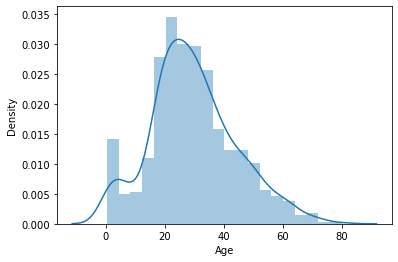

In [17]:
sns.distplot(train['Age'])

In [18]:
train_age = np.random.randint(train['Age'].mean()-train['Age'].std(), train['Age'].mean() + train['Age'].std(), 177)

In [19]:
test_age = np.random.randint(test['Age'].mean()-test['Age'].std(), test['Age'].mean() + test['Age'].std(), 86)

In [20]:
train['Age'][train['Age'].isnull()] = train_age

<ipython-input-20-d26f20a37bbc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Age'][train['Age'].isnull()] = train_age


In [21]:
test['Age'][test['Age'].isnull()] = test_age

<ipython-input-21-59ce13c7b122>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Age'][test['Age'].isnull()] = test_age


In [22]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### EDA

In [23]:
train[train['Pclass']==3]['Survived'].value_counts()

0    372
1    119
Name: Survived, dtype: int64

In [24]:
train.groupby(['Pclass'])['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [25]:
119/(372+119)

0.24236252545824846

In [26]:
train.groupby(['Sex'])['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [27]:
train.groupby(['Embarked'])['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

In [28]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

C:\Users\Yashwant Singh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Yashwant Singh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

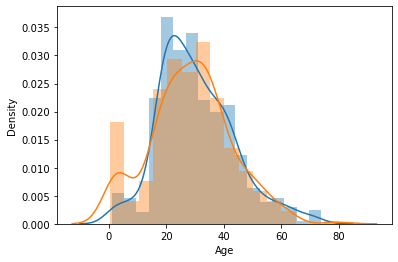

In [29]:
sns.distplot(train['Age'][train['Survived']==0])
sns.distplot(train['Age'][train['Survived']==1])

C:\Users\Yashwant Singh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Yashwant Singh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

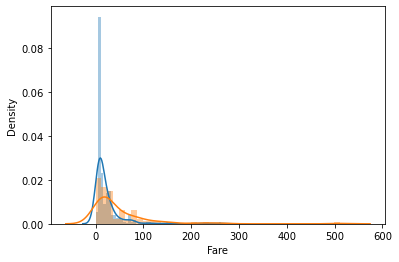

In [30]:
sns.distplot(train['Fare'][train['Survived']==0])
sns.distplot(train['Fare'][train['Survived']==1])

In [31]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [32]:
train.drop(columns=['Ticket'],inplace=True)
test.drop(columns=['Ticket'],inplace=True)

In [33]:
train['family'] = train['SibSp'] + train['Parch'] + 1

In [34]:
test['family'] = test['SibSp'] + test['Parch'] + 1

In [35]:
train['family'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: family, dtype: int64

In [36]:
train.groupby(['family'])['Survived'].mean()

family
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

In [37]:
def cal(number):
    if number==1:
        return "Alone"
    elif number>1 and  number<5:
        return "Medium"
    else:
        return "Large"

In [38]:
train['family_size'] = train['family'].apply(cal)

In [39]:
test['family_size'] = test['family'].apply(cal)

In [40]:
train.drop(columns=['SibSp','Parch','family'],inplace=True)
test.drop(columns=['SibSp','Parch','family'],inplace=True)

In [41]:
print(train.shape)
print(test.shape)

(891, 9)
(418, 8)


In [42]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
Fare           0
Embarked       0
family_size    0
dtype: int64

In [43]:
passengerId = test['PassengerId'].values

In [44]:
train.drop(columns=['Name','PassengerId'],inplace=True)
test.drop(columns=['Name','PassengerId'],inplace=True)

In [45]:
train.isnull().sum()

Survived       0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
family_size    0
dtype: int64

In [46]:
train.shape

(891, 7)

In [47]:
train = pd.get_dummies(train, columns = ['Pclass','Sex','Embarked','family_size'],drop_first=True)

In [48]:
train.shape

(891, 10)

In [49]:
test = pd.get_dummies(test, columns = ['Pclass','Sex','Embarked','family_size'],drop_first=True)

In [50]:
test.shape

(418, 9)

In [51]:
X = train.iloc[:,1:].values
y = train.iloc[:,0].values

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [53]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()

In [54]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [55]:
y_pred = classifier.predict(X_test)

In [56]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.7597765363128491

In [57]:
X_final = test.iloc[:,:].values

In [58]:
y_final = classifier.predict(X_final)

In [59]:
y_final.shape

(418,)

In [60]:
passengerId.shape

(418,)

In [61]:
final = pd.DataFrame()

In [62]:
final

""


In [63]:
final['passengerId'] = passengerId
final['survived'] = y_final

In [64]:
final.to_csv('submission.csv',index=False)